# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it"sbeing processed (with the city number and city name).


In [4]:

#create base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#create empty list to store json responses
response_json = []

#create for loop to query API...
for x in cities:
    #create query url
    query_url = f"{base_url}&q={x}&appid={api_key}"
    
    #create variable that queries the API with the query url
    response = requests.get(query_url)
    
    #if we received a valid responce from the API append the response to the empty list we created earlier
    if response.json()["cod"] == 200:
        
        response_json.append(response.json())
        #and print
        print(f"Processing Record {len(response_json)} of Set 1 | {x}")
   #if we dont get a valid response print this instead...
    else:
        print(f"{x} was not found, skipping.")
        
        
print(f"----------------------------------------------------")
print(f"Data Retrieval Complete")
print(f"----------------------------------------------------")

Processing Record 1 of Set 1 | motygino
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | salisbury
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | san policarpo
Processing Record 8 of Set 1 | rikitea
tsihombe was not found, skipping.
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | bon air
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | quang ngai
Processing Record 15 of Set 1 | ecoporanga
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | colac
Processing Record 22 of Set 1 | cabo san lucas
Processing Record 23 of Set 1 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#create empty list to store data
data = []

#create for loop to add required columns
for ind_json in range(len(response_json)):
    data.append([response_json[ind_json]["name"], 
        response_json[ind_json]["clouds"]["all"],
        response_json[ind_json]["sys"]["country"],
        response_json[ind_json]["dt"],
        response_json[ind_json]["main"]["humidity"],
        response_json[ind_json]["coord"]["lat"],
        response_json[ind_json]["coord"]["lon"],
        response_json[ind_json]["main"]["temp_max"],           
        response_json[ind_json]["wind"]["speed"]])  

#create a datarfame from the data list we created
data_df = pd.DataFrame(data,columns= ["Name","Cloudiness","Country","Date","Humidity", "Latitude", "Longitude",
        "Max Temperature",  "Wind Speed"])
#create a csv with the dataframe
data_df.to_csv(path_or_buf="output.csv",index=False)
data_df.head(20)

,Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Motygino,97,RU,1571813334,54,58.18,94.69,272.75,3.26
1,Portland,90,US,1571813334,93,43.66,-70.25,285.37,3.60
2,Salisbury,40,GB,1571813123,100,51.07,-1.80,280.37,1.00
3,Punta Arenas,75,CL,1571813334,70,-53.16,-70.91,279.15,6.20
4,Beringovskiy,100,RU,1571813335,90,63.05,179.32,272.91,11.58
5,Port Elizabeth,90,US,1571813335,87,39.31,-74.98,290.15,4.10
6,San Policarpo,2,PH,1571813335,62,12.18,125.51,302.84,2.93
7,Rikitea,100,PF,1571813336,85,-23.12,-134.97,294.21,7.64
8,Arraial do Cabo,30,BR,1571813336,78,-22.97,-42.02,294.87,2.55
9,Bon Air,90,US,1571813336,93,37.52,-77.56,288.71,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

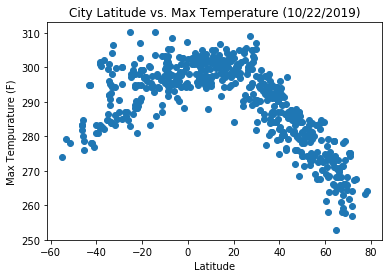

In [24]:
#create a scatterplot w/ Latitude as the x axis and max temp as the y axis
plt.scatter(data_df["Latitude"], data_df["Max Temperature"])

#add title and axis titles
plt.title("City Latitude vs. Max Temperature (10/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (F)")

#create png
plt.savefig("Lat_v_Temp.png")

#display plot
plt.show()



#### Latitude vs. Humidity Plot

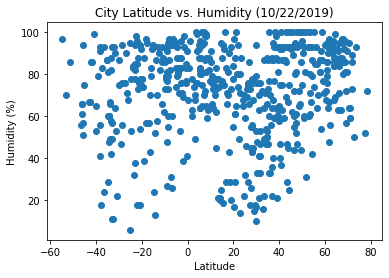

In [25]:
# create scatterplot with latitude as the x axis and humidity as the y.
plt.scatter(data_df["Latitude"],data_df["Humidity"])

#add title and axis titles
plt.title("City Latitude vs. Humidity (10/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#create png
plt.savefig("Lat_v_Humd.png")

plt.show()



#### Latitude vs. Cloudiness Plot

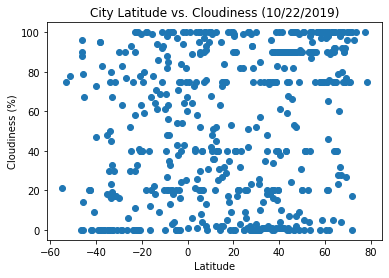

In [26]:
plt.scatter(data_df["Latitude"],data_df["Cloudiness"])

#add title and axis titles
plt.title("City Latitude vs. Cloudiness (10/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#create png
plt.savefig("Lat_v_cloud.png")

plt.show()



#### Latitude vs. Wind Speed Plot

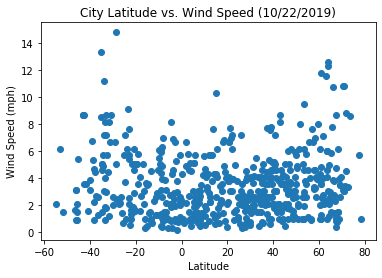

In [27]:
plt.scatter(data_df["Latitude"],data_df["Wind Speed"])

#add title and axis titles
plt.title("City Latitude vs. Wind Speed (10/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#create png
plt.savefig("Lat_v_wind.png")

plt.show()

